# Algoritmo KNN



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Descripción de la base de datos

About Dataset
Context
Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

Content
Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.


* Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [2]:
data=pd.read_csv('concrete_data.csv')
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [3]:
#data=data[data['Age']<=28]
data=data[['Cement','Water','Coarse Aggregate','Age','Fine Aggregate','Fly Ash','Blast Furnace Slag','Superplasticizer','Strength']]

C:\Users\aldoa\AppData\Local\Temp\ipykernel_34316\3595810033.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[[columna for columna in data.columns if columna != 'Strength']].hist(ax=ax)


array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fine Aggregate'}>,
        <AxesSubplot:title={'center':'Fly Ash'}>],
       [<AxesSubplot:title={'center':'Blast Furnace Slag'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>,
        <AxesSubplot:>]], dtype=object)

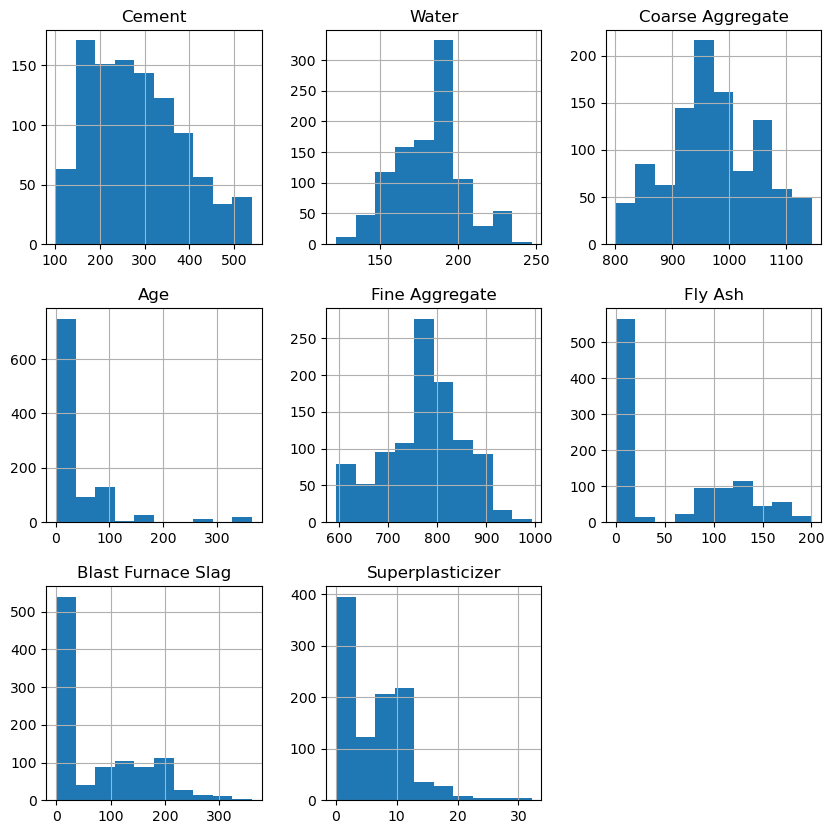

In [4]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data[[columna for columna in data.columns if columna != 'Strength']].hist(ax=ax)

{'whiskers': [<matplotlib.lines.Line2D at 0x22647ca60a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22647ca6640>,
 'boxes': [<matplotlib.lines.Line2D at 0x22647c8fd90>,
 'medians': [<matplotlib.lines.Line2D at 0x22647ca6be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22647ca6eb0>,
 'means': []}

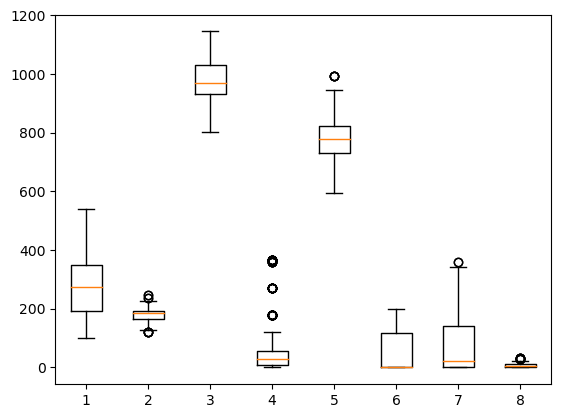

In [5]:
plt.boxplot(data[[columna for columna in data.columns if columna != 'Strength']])

In [6]:
data['Strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Strength, dtype: float64

## Nueva nomenclatura.

Se realizó una categorización de los concretos según su uso como se observa en [PSI construcción](https://psiconcreto.com/concreto-de-alta-resistencia/) y se encontrarón principalmente los siguientes tipos:

* Concreto pobre o de baja resistencia: $H_{<30}$  $H_x\leq 306$ $kg/cm^2$
* Concreto de uso convencional:$H_{[30,45]}$ $306>H_x\leq 458$ $kg/cm^2$ 
* Concreto de alta resistencia: $H_{[45,60]}$, $458>H_x \leq 611$ $kg/cm^2$ 
* Concreto de ultra alta resistencia: $H_{>60}$, $H_x > 611$ $kg/cm^2$ 

In [7]:
condiciones = [
    data['Strength'] <= 30,
    (data['Strength'] > 30) & (data['Strength'] <= 45),
    (data['Strength'] > 45) & (data['Strength'] <= 60),
    data['Strength'] > 60
]
valores = [0, 1, 2, 3]

data['Strength']=np.select(condiciones,valores)

Cantidad de desbalance con clase  36
porcentaje de desbalance  9.045226130653266
Cantidad de desbalance con clase  222
porcentaje de desbalance  55.778894472361806
Cantidad de desbalance con clase  304
porcentaje de desbalance  76.38190954773869


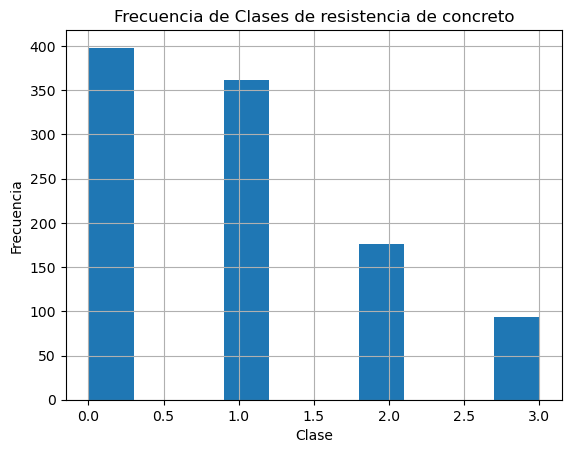

In [8]:
data['Strength'].hist()
valores=data['Strength'].value_counts()
plt.title('Frecuencia de Clases de resistencia de concreto')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
for aa in range(len(valores)-1):
    temp=valores[0]-valores[aa+1]
    print('Cantidad de desbalance con clase ',temp)
    porct=(100*temp)/valores[0]
    print('porcentaje de desbalance ',porct)

In [9]:
data_eq=pd.DataFrame(data)
data3=pd.DataFrame(data)
data_raw=pd.DataFrame(data)
def euc_dis(x1,x2):
    return np.sqrt((x1-x2)**2)

def e_dis_abs(x1,x2):
    #r,c=x1.shape
    x3=(x1-x2)**2
    x4=np.sqrt(sum(x3))
    return x4
        

def smotev1(minclass,val_class,ndg):
    ## Tomar dos valores aleatorios
    np.random.seed(734289) ###################### 220
    re,c=minclass.shape
    sdata=np.zeros((1,c))
    for a in range(ndg):
        sel_rnd=np.random.choice(re,2,replace=False)
        #dis=euc_dis(minclass.iloc[sel_rnd[0]],minclass.iloc[sel_rnd[1]])
        sdata=np.vstack((sdata,(minclass.iloc[sel_rnd[0]]+(np.random.uniform(0,1)*
                                                           (minclass.iloc[sel_rnd[1]]-minclass.iloc[sel_rnd[0]])))))
    sdata=np.delete(sdata,0,0)
    df=pd.DataFrame(sdata,columns=minclass.columns)
    df['Strength']=val_class
    return df





In [10]:
max_class=data_eq[data_eq['Strength']==0]
min_class1=data_eq[data_eq['Strength']==1]
min_class2=data_eq[data_eq['Strength']==2]
min_class3=data_eq[data_eq['Strength']==3]
minclases=[min_class1,min_class2,min_class3]
bal_class=[]
ndf=[36,222,304]
for aa in range(3):
    bal_class.append(smotev1(minclases[aa],aa+1,ndf[aa]))
    data_eq=pd.concat([data_eq,bal_class[-1]], ignore_index=True)
#print(bal_class[0].shape)

(1592, 9)


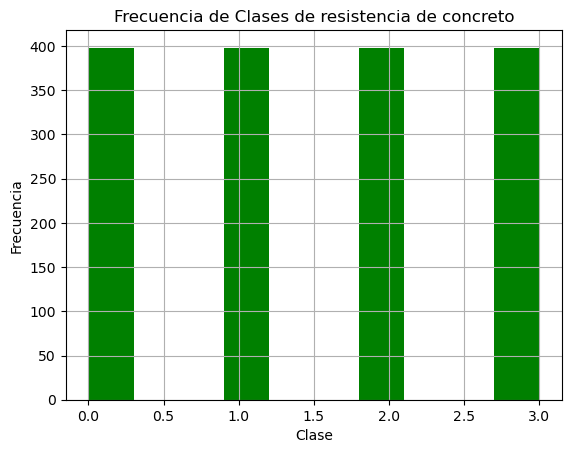

In [11]:
data_eq['Strength'].hist(color=['green'])
plt.title('Frecuencia de Clases de resistencia de concreto')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
print(data_eq.shape)

In [12]:
data_eq.isnull().sum()
print('No hay valores faltantes')

No hay valores faltantes


# Realiza analisis de componentes principales con y sin generación de datos sintenticos.

In [13]:
def covarianza(X,Y):
    x_mean = X.mean()
    y_mean = Y.mean()
    n = len(X)
    cov = (((X-x_mean)*(Y-y_mean)).sum())/(n-1)
    return cov

def matriz_cov(data):
    atributos = data.columns
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = covarianza(X,Y)
    return m

def pca1(data): # Ya tiene que estar normalizado
    atributos = list(data.columns)
    n = len(atributos)
    for a in atributos:
        data[a]=data[a]-data[a].mean()
    #m_cov=matriz_cov(data)
    m_cov=np.cov(np.transpose(data))
    #sns.heatmap(m_cov,annot=True)
    eival,eivec=np.linalg.eig(m_cov)
    p=(eival/eival.sum())*100
    return p,eivec

def ordenar(porcentajes,columnas):
    n=len(columnas)
    p2=porcentajes.copy()
    porcentaje=np.sort(porcentajes)[::-1]
    dicti={}
    for a in range(n):
        ub=int(np.where(porcentaje[a]==p2)[0])
        dicti[columnas[ub]]=porcentaje[a]
    return dicti

In [14]:
#### Normalización

def norm_min_max(x,a,b): # Para todo el dataFrame
    l=list(x.columns)
    v_max=0
    v_min=0
    res=pd.DataFrame()
    for val in l:
        v_max=x[val].max()
        v_min=x[val].min()
        r_dt=v_max-v_min
        r_norm=b-a
        d=x[val]-v_min
        dpct=d/r_dt
        dnorm=r_norm*dpct
        data=a+dnorm
        aa=pd.DataFrame(data,columns=[val])
        res[val]=data
    return res

def sigmoid(db):
    media=db.mean()
    dstd=db.std()
    return 1/(1+np.exp(-((db-media)/(dstd))))

In [15]:
#data=data[data['Age']<28]


print(data_eq.shape)
data2=pd.DataFrame(data_eq)
data_eq=norm_min_max(data_eq[[columna for columna in data_eq.columns if columna != 'Strength']],0,1)
porcentaje,eivec=pca1(data_eq[[columna for columna in data_eq.columns if columna != 'Strength']])
por=ordenar(porcentaje,[columna for columna in data_eq.columns if columna != 'Strength'])
print(por)

print(data.shape)

(1592, 9)
{'Cement': 31.185943733989003, 'Water': 20.382246119394278, 'Coarse Aggregate': 18.360425124724383, 'Blast Furnace Slag': 11.324978732869177, 'Superplasticizer': 10.317974274027831, 'Fly Ash': 6.196758033453855, 'Fine Aggregate': 1.9010783933969773, 'Age': 0.330595588144499}
(1030, 9)


## 5 Componentes principales, suman 91.55%

{'Cement': 31.185943733989003, 'Water': 20.382246119394278, 'Coarse Aggregate': 18.360425124724383, 'Blast Furnace Slag': 11.324978732869177, 'Superplasticizer': 10.317974274027831, 'Fly Ash': 6.196758033453855, 'Fine Aggregate': 1.9010783933969773, 'Age': 0.330595588144499}
       

In [16]:
#data.shape
datan_pca=data_eq[['Cement','Water','Coarse Aggregate', 'Blast Furnace Slag', 'Superplasticizer']]
datan_pca=pd.concat([datan_pca,data2['Strength']],axis=1)

print(datan_pca.shape)
print(data.shape)

(1592, 6)
(1030, 9)


In [17]:
data=norm_min_max(data[[columna for columna in data_eq.columns if columna != 'Strength']],0,1)

Text(0.5, 1.0, 'Distribución de cemento')

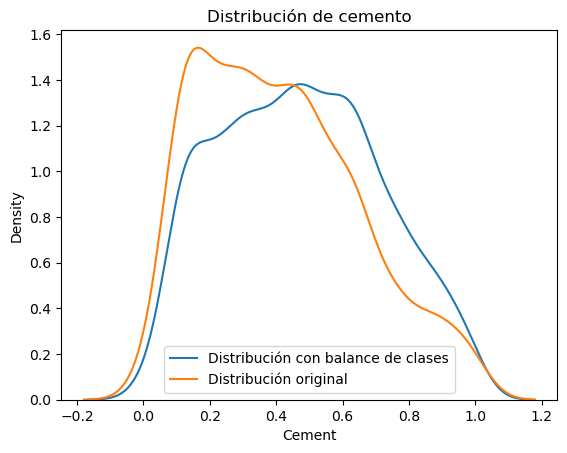

In [18]:
sns.kdeplot(datan_pca['Cement'])
sns.kdeplot(data['Cement'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de cemento')

Text(0.5, 1.0, 'Distribución de agua')

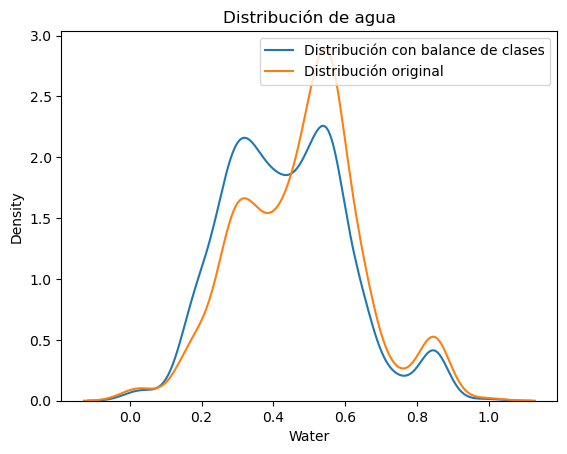

In [19]:
sns.kdeplot(datan_pca['Water'])
sns.kdeplot(data['Water'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de agua')

Text(0.5, 1.0, 'Distribución de grava')

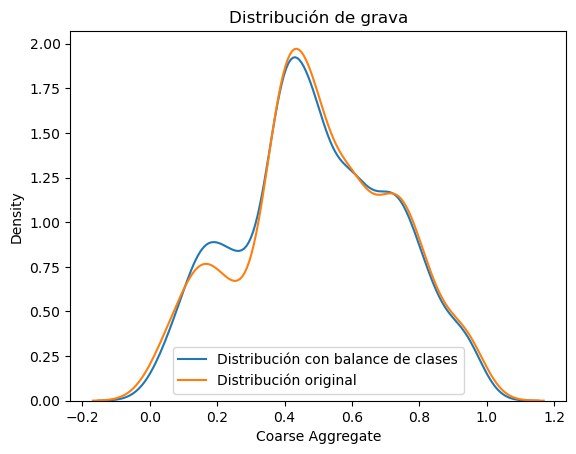

In [20]:
sns.kdeplot(datan_pca['Coarse Aggregate'])
sns.kdeplot(data['Coarse Aggregate'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de grava')

Text(0.5, 1.0, 'Distribución de escoria')

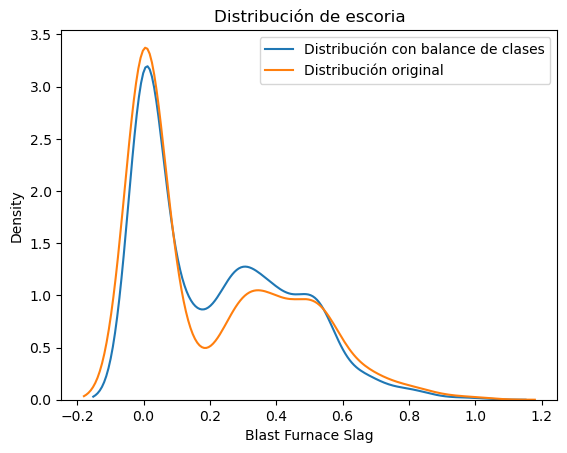

In [21]:
sns.kdeplot(datan_pca['Blast Furnace Slag'])
sns.kdeplot(data['Blast Furnace Slag'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de escoria')

Text(0.5, 1.0, 'Distribución de aditivo')

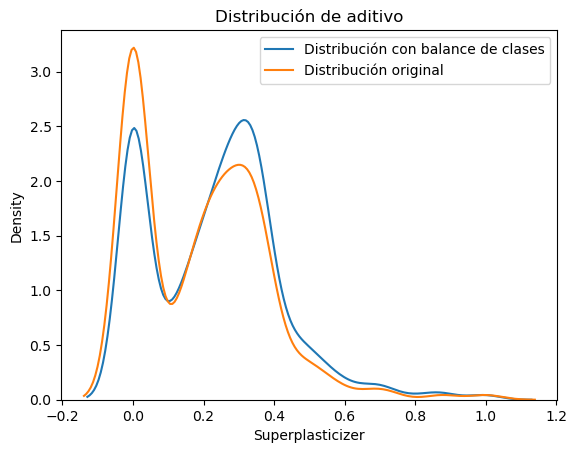

In [22]:
sns.kdeplot(datan_pca['Superplasticizer'])
sns.kdeplot(data['Superplasticizer'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de aditivo')

Text(0.5, 1.0, 'Distribución de esfuerzo')

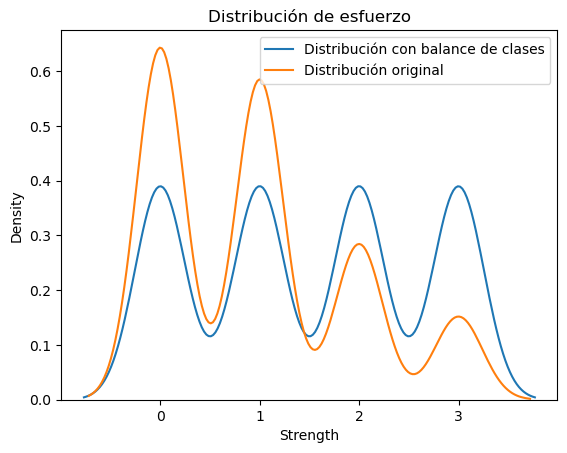

In [23]:
sns.kdeplot(datan_pca['Strength'])
#data3=pd.read_csv('concrete_data.csv')
sns.kdeplot(data3['Strength'])
plt.legend(['Distribución con balance de clases','Distribución original'])
plt.title('Distribución de esfuerzo')

In [24]:
datan_pca.describe()

,Cement,Water,Coarse Aggregate,Blast Furnace Slag,Superplasticizer,Strength
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,0.472944,0.436815,0.493001,0.216953,0.232342,1.500000
std,0.241549,0.169346,0.223704,0.220972,0.188279,1.118385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271233,0.305493,0.364525,0.000000,0.000000,0.750000
50%,0.467208,0.428914,0.482558,0.153657,0.248447,1.500000
75%,0.649252,0.560703,0.661047,0.386917,0.347826,2.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
data3[['Cement','Water','Coarse Aggregate', 'Blast Furnace Slag', 'Superplasticizer','Strength']].describe()

,Cement,Water,Coarse Aggregate,Blast Furnace Slag,Superplasticizer,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,181.567282,972.918932,73.895825,6.204660,0.966990
std,104.506364,21.354219,77.753954,86.279342,5.973841,0.960279
min,102.000000,121.800000,801.000000,0.000000,0.000000,0.000000
25%,192.375000,164.900000,932.000000,0.000000,0.000000,0.000000
50%,272.900000,185.000000,968.000000,22.000000,6.400000,1.000000
75%,350.000000,192.000000,1029.400000,142.950000,10.200000,2.000000
max,540.000000,247.000000,1145.000000,359.400000,32.200000,3.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22649dc6490>,
 'caps': [<matplotlib.lines.Line2D at 0x22649dc6a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22649dc62e0>,
 'medians': [<matplotlib.lines.Line2D at 0x22649dc6fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x22649dd12e0>,
 'means': []}

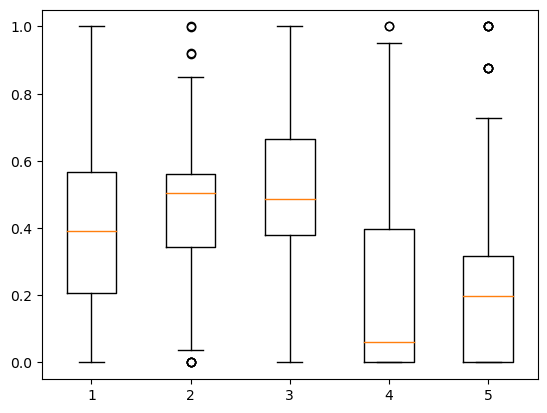

In [26]:
plt.boxplot(data[[columna for columna in datan_pca.columns if columna != 'Strength']])

<AxesSubplot:>

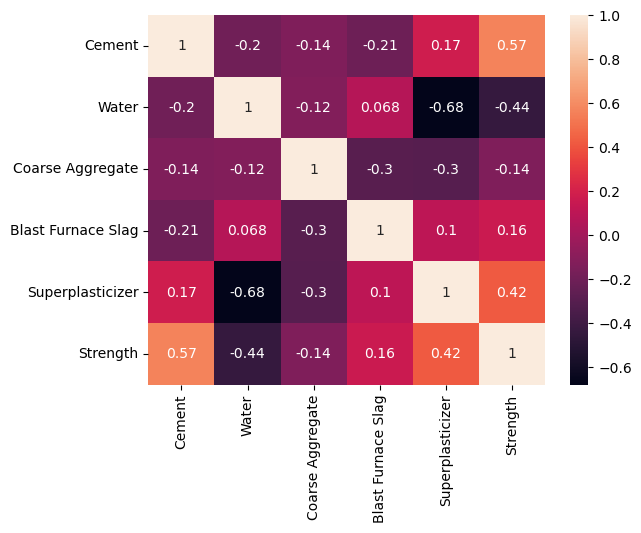

In [27]:
### Correlacion entre valores
sns.heatmap(datan_pca[:-1].corr(),annot=True)

In [28]:
# entrenamiento con 80/20
np.random.seed(4567)
entrenamiento80=datan_pca.sample(n=int(datan_pca.shape[0]*0.8))
prueba20=datan_pca[~datan_pca.index.isin(entrenamiento80.index)] # [~datan_pca.index.isin(entrenamiento80.index)]

In [29]:
entrenamiento80.shape
#entrenamiento_target=entrenamiento80.pop('Strength')

(1273, 6)

In [30]:
entrenamiento80.tail()

,Cement,Water,Coarse Aggregate,Blast Furnace Slag,Superplasticizer,Strength
1569,0.874165,0.430926,0.806825,0.200503,0.081508,3
1405,0.998387,0.320837,0.737090,0.000206,0.078658,3
231,0.255023,0.478435,0.769767,0.272955,0.214286,2
1582,0.604761,0.149332,0.281088,0.155437,0.529827,3
37,0.526256,0.848243,0.380814,0.396494,0.000000,1


In [31]:
prueba20.shape
#prueba_target=prueba20.pop('Strength')

(319, 6)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def elbow_m(dist,n,columna):
    val_min=dist.nsmallest(n,columna)
    #index_min=val_min.index
    return np.sum(val_min)/n
    

def mod_knn(train,pr,n):
    rent,colt=train.shape
    renpr,colpr=pr.shape
    tr=pd.DataFrame(train)
    proof=pd.DataFrame(pr)
    prediccion=pd.DataFrame(np.zeros((renpr,1)),columns=['prediccion'])
    #train_target=tr.pop('Strength')
    #pr_target=proof.pop('Strength')
    e_met=[]
    problema=0
    dist_temp=pd.DataFrame(np.zeros((rent,1)),columns=['Dist'])
    for aa in range(renpr):
        for bb in range(rent):
            dist_temp.iloc[bb,0]=e_dis_abs(proof.iloc[aa,:-1],tr.iloc[bb,:-1])
        
        mindis=dist_temp.nsmallest(n,'Dist')
        indmin=mindis.index
        recuento=tr.iloc[indmin,-1].value_counts()
        cuenta_maxima = recuento.max()
        categorias_mas_frecuentes = recuento[recuento == cuenta_maxima].index.tolist()
        if len(categorias_mas_frecuentes)>1:
            problema+=1
        #    cat=np.zeros((n,1))
        #    for xx in range(n): # vecinos cercanos que causan problema
        #        cat[tr.iloc[indmin[xx],-1],0]+=dist_temp.iloc[indmin[xx],0]
        #        
        #    prediccion.iloc[aa,:]=np.argmin(cat)
        #else:
        prediccion.iloc[aa,:]=recuento.idxmax()
        """
        ### Ya funciono#################
        #e_met.append(elbow_m(dist_temp,n,'Dist'))
        mindis=dist_temp.nsmallest(n,'Dist')
        indmin=mindis.index
        recuento=tr.iloc[indmin,-1].value_counts()
        #recuento=mindis['Dist'].value_counts()
        prediccion.iloc[aa,:]=recuento.idxmax()
        """
    print(problema)
    return prediccion.astype(int)

In [33]:
############################ Método del codo ###########
"""
import time

t1=time.time()
elbow=[]
n_range=[]
ot=[]
for o in range(30):
    resp=mod_knn(entrenamiento80,prueba20,o+1)
    elbow.append(accuracy_score(prueba20.iloc[:,-1],resp))
    ot.append(o+1)
t2=time.time()

plt.plot(ot,elbow)


#plt.plot(elbow)
#plt.scatter(6,elbow[6],color='red')
#plt.title('Método del codo ')
#plt.xlabel('n Vecinos')
#plt.ylabel('Distancia')
"""

"\nimport time\n\nt1=time.time()\nelbow=[]\nn_range=[]\not=[]\nfor o in range(30):\n    resp=mod_knn(entrenamiento80,prueba20,o+1)\n    elbow.append(accuracy_score(prueba20.iloc[:,-1],resp))\n    ot.append(o+1)\nt2=time.time()\n\nplt.plot(ot,elbow)\n\n\n#plt.plot(elbow)\n#plt.scatter(6,elbow[6],color='red')\n#plt.title('Método del codo ')\n#plt.xlabel('n Vecinos')\n#plt.ylabel('Distancia')\n"

In [34]:
pred=mod_knn(entrenamiento80,prueba20,7)

8


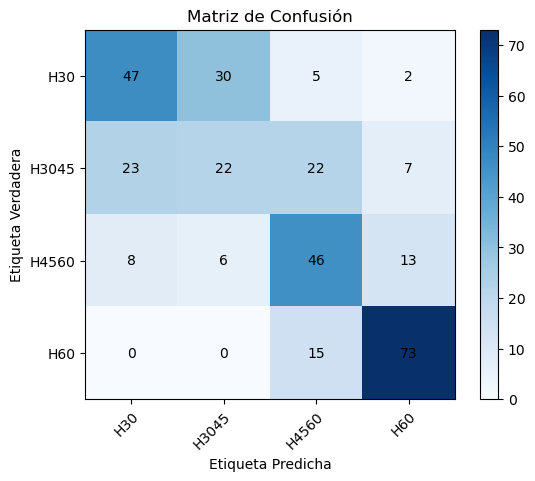

exactitud:  0.5893416927899686
Precisión ind:  [0.6025641  0.37931034 0.52272727 0.76842105]
precisión total:  0.568255693187635
sensibilidad ind (recall):  [0.55952381 0.2972973  0.63013699 0.82954545]
Sensibilidad total:  0.5791258869169829
f1 score individual:  [0.58024691 0.33333333 0.57142857 0.79781421]
f1 score total:  0.5707057564981062


In [35]:
#"""
pred.astype(int)
matriz_confusion=confusion_matrix(prueba20.iloc[:,-1],pred)
precision=precision_score(prueba20.iloc[:,-1],pred,average=None)
exactitud=accuracy_score(prueba20.iloc[:,-1],pred)
sensibilidad=recall_score(prueba20.iloc[:,-1],pred,average=None)
f1=f1_score(prueba20.iloc[:,-1],pred,average=None)

labels=['H30','H3045','H4560','H60']
fig, ax = plt.subplots()
im = ax.imshow(matriz_confusion, cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Iterar sobre los datos y agregar el valor en cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, matriz_confusion[i, j], ha="center", va="center", color="black")

# Configurar título y etiquetas de los ejes
ax.set_title("Matriz de Confusión")
ax.set_xlabel("Etiqueta Predicha")
ax.set_ylabel("Etiqueta Verdadera")

# Mostrar la figura
plt.show()
print('exactitud: ',exactitud)
print('Precisión ind: ',precision)
print('precisión total: ', np.mean(precision))
print('sensibilidad ind (recall): ',sensibilidad)
print('Sensibilidad total: ', np.mean(sensibilidad))
print('f1 score individual: ',f1)
print('f1 score total: ', np.mean(f1))
#"""

In [36]:
entrenamiento80.tail()

,Cement,Water,Coarse Aggregate,Blast Furnace Slag,Superplasticizer,Strength
1569,0.874165,0.430926,0.806825,0.200503,0.081508,3
1405,0.998387,0.320837,0.737090,0.000206,0.078658,3
231,0.255023,0.478435,0.769767,0.272955,0.214286,2
1582,0.604761,0.149332,0.281088,0.155437,0.529827,3
37,0.526256,0.848243,0.380814,0.396494,0.000000,1


In [37]:
#pred.value_counts()

In [38]:
# K-folds
k_folds=7
bins=np.array_split(datan_pca,k_folds)
#print(bins[0].shape)

In [39]:
########################################### K-folds #################################
#"""
res=[]
pres=[]
sens=[]
exac=[]
f1sc=[]

for f in range(k_folds):
    excluded_group=bins[f]
    tr_group=[grupo for j, grupo in enumerate(bins) if j!=f]
    concatenated_data=pd.concat(tr_group,axis=0)
    res.append(mod_knn(concatenated_data,excluded_group,6))
    pres.append(precision_score(excluded_group.iloc[:,-1],res[-1],average=None))
    exac.append(accuracy_score(excluded_group.iloc[:,-1],res[-1]))
    sens.append(recall_score(excluded_group.iloc[:,-1],res[-1],average=None,zero_division=1))
    f1sc.append(f1_score(excluded_group.iloc[:,-1],res[-1],average=None,zero_division=1))

print('exactitud en cada prueba: ',exac)
print('precisión promedio en cada clase en todas los kfolds: ', np.mean(pres,axis=0))
print('Precisión total: ',np.mean(pres))
print('sensibilidad (recall) promedio en cada clase en todos los kfold: ',np.mean(sens,axis=0))
print('Sensibilidad total: ', np.mean(sensibilidad))
print('f1 score promedio en cada clase de kfolds: ',np.mean(f1,axis=0))
print('f1 score total: ', np.mean(f1))
#"""

21
54
56
71
39
26
43
exactitud en cada prueba:  [0.5131578947368421, 0.40350877192982454, 0.4780701754385965, 0.6475770925110133, 0.6211453744493393, 0.6079295154185022, 0.5991189427312775]
precisión promedio en cada clase en todas los kfolds:  [0.43598696 0.38249706 0.47310148 0.5214824 ]
Precisión total:  0.4532669742574633
sensibilidad (recall) promedio en cada clase en todos los kfold:  [0.71546319 0.51972696 0.63777969 0.8191382 ]
Sensibilidad total:  0.5791258869169829
f1 score promedio en cada clase de kfolds:  0.5707057564981062
f1 score total:  0.5707057564981062


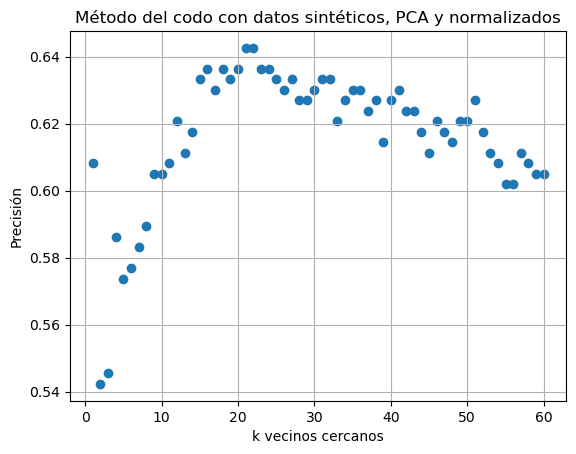

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
score_acc=[]
kk=[]
#knn_sk=KNeighborsClassifier(n_neighbors=11)
#res=knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
#print(knn_sk.predict(prueba20.iloc[:,:-1]))
#"""
for k in range(60):
    knn_sk=KNeighborsClassifier(n_neighbors=k+1)
    knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
    score_acc.append(knn_sk.score(prueba20.iloc[:,:-1],prueba20.iloc[:,-1]))
    kk.append(k+1)
#"""
plt.scatter(kk,score_acc)
plt.xlabel('k vecinos cercanos')
plt.ylabel('Precisión')
plt.title('Método del codo con datos sintéticos, PCA y normalizados')
plt.grid()

In [41]:
for ll in range(17,23):
    knn_sk=KNeighborsClassifier(n_neighbors=ll)
    knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])    
    kn=knn_sk.predict(prueba20.iloc[:,:-1])
    metric=classification_report(prueba20.iloc[:,-1],kn)
    print('prueba con k=',ll)
    print(metric)

prueba con k= 17
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        84
           1       0.51      0.31      0.39        74
           2       0.56      0.58      0.57        73
           3       0.73      0.91      0.81        88

    accuracy                           0.63       319
   macro avg       0.61      0.62      0.60       319
weighted avg       0.61      0.63      0.61       319

prueba con k= 18
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        84
           1       0.51      0.27      0.35        74
           2       0.57      0.59      0.58        73
           3       0.75      0.93      0.83        88

    accuracy                           0.64       319
   macro avg       0.61      0.62      0.60       319
weighted avg       0.62      0.64      0.61       319

prueba con k= 19
              precision    recall  f1-score   support

           0       0.62 

In [42]:
## K-folds
neigh=[17,19,21]
folds=[3,5,7,9]

kfoldacc=np.zeros((len(folds),len(neigh)))
kfoldpres=np.zeros((len(folds),len(neigh)))
kfoldrecall=np.zeros((len(folds),len(neigh)))
kfoldf1=np.zeros((len(folds),len(neigh)))

kfa=[]
kfp=[]
kfr=[]
kff1=[]
#kfoldmet=np.zeros()

for aa in range(len(folds)):
    np.random.seed(2345)
    bins=np.array_split(datan_pca,folds[aa])
    for bb in range(len(neigh)):
        kfoldacc=np.zeros((folds[aa],1))
        kfoldpres=np.zeros((folds[aa],1))
        kfoldrecall=np.zeros((folds[aa],1))
        kfoldf1=np.zeros((folds[aa],1))
        for f in range(folds[aa]):
            excluded_group=bins[f]
            #print('ex',excluded_group.shape)
            tr_group=[grupo for j, grupo in enumerate(bins) if j!=f]
            concatenated_data=pd.concat(tr_group,axis=0)
            #print('conc',concatenated_data.shape)
            knn_sk=KNeighborsClassifier(n_neighbors=neigh[bb])
            knn_sk.fit(concatenated_data.iloc[:,:-1],concatenated_data.iloc[:,-1])
            kn=knn_sk.predict(excluded_group.iloc[:,:-1])
            metric=classification_report(excluded_group.iloc[:,-1],kn,output_dict=True,zero_division=1)
            #print('metrica',metric)
            kfoldacc[f,]=metric['accuracy']
            kfoldpres[f,]=metric['weighted avg']['precision']
            kfoldrecall[f,]=metric['weighted avg']['recall']
            kfoldf1[f,]=metric['weighted avg']['f1-score']
        #print(f)
        kfa.append(np.mean(kfoldacc))
        kfp.append(np.mean(kfoldpres))
        kfr.append(np.mean(kfoldrecall))
        kff1.append(np.mean(kfoldf1))
        #kfoldmet[]
        
#knn_sk=KNeighborsClassifier(n_neighbors=17)
#knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
#kn=knn_sk.predict(prueba20.iloc[:,:-1])
#metric=classification_report(prueba20.iloc[:,-1],kn,output_dict=True)
#metric['weighted avg']#['precision']


In [43]:
kff1

[0.40416710372679177,
 0.4074588729178048,
 0.3960401109981903,
 0.4600006742847783,
 0.45776936952580866,
 0.4624234250779655,
 0.5585201404168109,
 0.5505953365152834,
 0.5621453257795391,
 0.5579528321369582,
 0.539150333415906,
 0.5417196706585305]

In [44]:
n_bins=3
bins=np.array_split(datan_pca,n_bins)
for f in range(n_bins):
    excluded_group=bins[f]
    print('ex',excluded_group.shape)
    tr_group=[grupo for j, grupo in enumerate(bins) if j!=f]
    concatenated_data=pd.concat(tr_group,axis=0)
    print('conc',concatenated_data.shape)
    knn_sk=KNeighborsClassifier(n_neighbors=17)
    knn_sk.fit(concatenated_data.iloc[:,:-1],concatenated_data.iloc[:,-1])
    kn=knn_sk.predict(excluded_group.iloc[:,:-1])
    metric=classification_report(excluded_group.iloc[:,-1],kn,output_dict=True,zero_division=1)
    print(metric)

ex (531, 6)
conc (1061, 6)
{'0': {'precision': 0.4625, 'recall': 0.2740740740740741, 'f1-score': 0.34418604651162793, 'support': 135}, '1': {'precision': 0.5, 'recall': 0.07386363636363637, 'f1-score': 0.12871287128712872, 'support': 176}, '2': {'precision': 0.3208955223880597, 'recall': 0.6277372262773723, 'f1-score': 0.42469135802469127, 'support': 137}, '3': {'precision': 0.47770700636942676, 'recall': 0.9036144578313253, 'f1-score': 0.625, 'support': 83}, 'accuracy': 0.3973634651600753, 'macro avg': {'precision': 0.4402756321893716, 'recall': 0.469822348636602, 'f1-score': 0.380647568955862, 'support': 531}, 'weighted avg': {'precision': 0.44077187965315745, 'recall': 0.3973634651600753, 'f1-score': 0.33743182236344094, 'support': 531}}
ex (531, 6)
conc (1061, 6)
{'0': {'precision': 0.728, 'recall': 0.34600760456273766, 'f1-score': 0.46907216494845366, 'support': 263}, '1': {'precision': 0.27472527472527475, 'recall': 0.11467889908256881, 'f1-score': 0.16181229773462785, 'support':

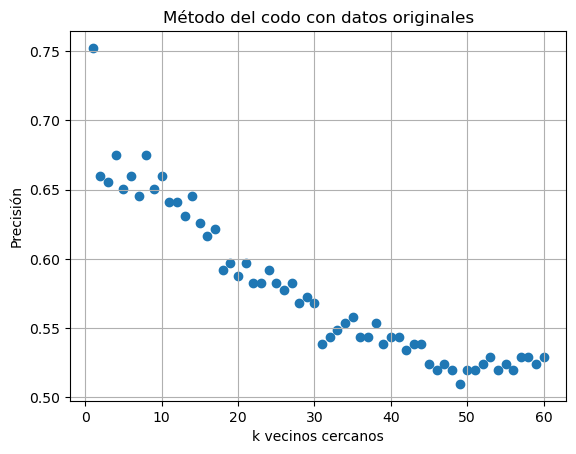

In [45]:
# Datos originales
np.random.seed(4567)
entrenamiento80=data3.sample(n=int(data3.shape[0]*0.8))
prueba20=data3[~data3.index.isin(entrenamiento80.index)]
#data3.shape
score_acc=[]
kk=[]
#knn_sk=KNeighborsClassifier(n_neighbors=11)
#res=knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
#print(knn_sk.predict(prueba20.iloc[:,:-1]))
#"""
for k in range(60):
    knn_sk=KNeighborsClassifier(n_neighbors=k+1)
    knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
    score_acc.append(knn_sk.score(prueba20.iloc[:,:-1],prueba20.iloc[:,-1]))
    kk.append(k+1)
#"""
plt.scatter(kk,score_acc)
plt.xlabel('k vecinos cercanos')
plt.ylabel('Precisión')
plt.title('Método del codo con datos originales')
plt.grid()

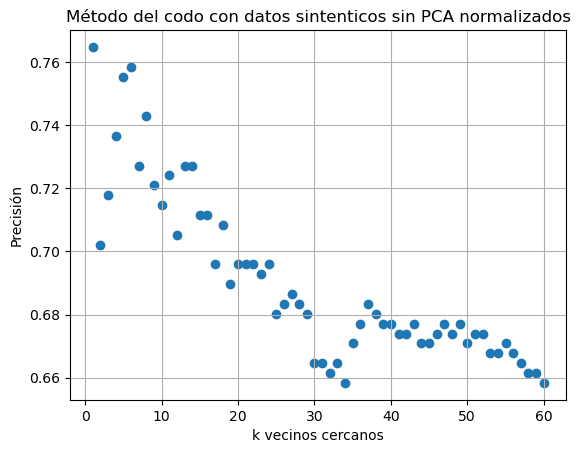

In [46]:
#data_eq.shape
np.random.seed(4567)
data_eq=pd.concat([data_eq,data2['Strength']],axis=1)
entrenamiento80=data_eq.sample(n=int(data_eq.shape[0]*0.8))
prueba20=data_eq[~data_eq.index.isin(entrenamiento80.index)]
#data3.shape
score_acc=[]
kk=[]
#knn_sk=KNeighborsClassifier(n_neighbors=11)
#res=knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
#print(knn_sk.predict(prueba20.iloc[:,:-1]))
#"""
for k in range(60):
    knn_sk=KNeighborsClassifier(n_neighbors=k+1)
    knn_sk.fit(entrenamiento80.iloc[:,:-1],entrenamiento80.iloc[:,-1])
    score_acc.append(knn_sk.score(prueba20.iloc[:,:-1],prueba20.iloc[:,-1]))
    kk.append(k+1)
#"""
plt.scatter(kk,score_acc)
plt.xlabel('k vecinos cercanos')
plt.ylabel('Precisión')
plt.title('Método del codo con datos sintenticos sin PCA normalizados')
plt.grid()

In [47]:
data_eq.head()

,Cement,Water,Coarse Aggregate,Age,Fine Aggregate,Fly Ash,Blast Furnace Slag,Superplasticizer,Strength
0,1.000000,0.321086,0.694767,0.074176,0.205720,0.0,0.000000,0.07764,3
1,1.000000,0.321086,0.738372,0.074176,0.205720,0.0,0.000000,0.07764,3
2,0.526256,0.848243,0.380814,0.739011,0.000000,0.0,0.396494,0.00000,1
3,0.526256,0.848243,0.380814,1.000000,0.000000,0.0,0.396494,0.00000,1
4,0.220548,0.560703,0.515698,0.986264,0.580783,0.0,0.368392,0.00000,1
